## ACTSC972 
## Final Project: Newton Method based Portfolio Management 


In [130]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import cvxopt
from scipy.optimize import minimize
from __future__ import division

#### Initial Data Set for Algorithm Design 

In [131]:
ibm_df = pd.read_csv('IBM.csv')
coca_df = pd.read_csv('KO.csv')

#### Data Cleansing

In [132]:
ibm_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,7.713333,7.713333,7.626667,7.626667,2.192523,387200
1,1962-01-03,7.626667,7.693333,7.626667,7.693333,2.211689,288000
2,1962-01-04,7.693333,7.693333,7.613333,7.616667,2.189648,256000
3,1962-01-05,7.606667,7.606667,7.453333,7.466667,2.146526,363200
4,1962-01-08,7.460000,7.460000,7.266667,7.326667,2.106280,544000


In [133]:
coca_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.058497,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.057194,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.057628,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.056325,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.055746,2035200


In [134]:
# convert date columns to datetime for analysis purposes 
date_conv = lambda x: pd.to_datetime(x)
ibm_df['Date'], coca_df['Date'] = ibm_df['Date'].apply(date_conv), coca_df.apply(date_conv)

In [135]:
ibm_df['Date'].head()

0   1962-01-02
1   1962-01-03
2   1962-01-04
3   1962-01-05
4   1962-01-08
Name: Date, dtype: datetime64[ns]

In [136]:
ibm_df, coca_df = ibm_df.set_index('Date'), coca_df.set_index('Date')

In [137]:
#Select to start analysis: 1985-01-05 to present
start = '1985-01-05'
ibm_df, coca_df = ibm_df.loc[start:], coca_df[start:]

### Basic Problem Formulation

In [138]:
# Price Relative Vectors
ibm_rt = ibm_df.iloc[1:,3].as_matrix()/ibm_df.iloc[0:-1, 3].as_matrix()
coca_rt = coca_df.iloc[1:,3].as_matrix()/coca_df.iloc[0:-1,3].as_matrix()

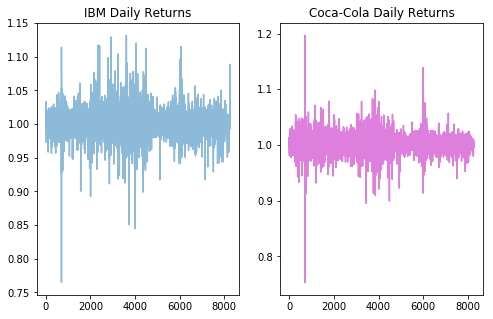

In [139]:
f, ((ax1,ax2)) = plt.subplots(1,2, figsize = (8,5))
ax1.plot(ibm_rt, alpha = 0.5)
ax1.set_title('IBM Daily Returns')
ax2.plot(coca_rt, color = 'm', alpha = 0.5)
ax2.set_title('Coca-Cola Daily Returns')
plt.show()

#### Online Newton Method Implementation 
- In our implementation of the Online Newton Method we make use of Lemma 2 in Newton Method based Portfolio Management 
- It is demonstrated that the algorithm is equivalent to the following maximization problem 
    - $p_{t} = \underset{p_{t} \in S_{n}}{\operatorname{argmax}} \sum_{\tau=1}^{t-1} f_{t}(p) - \frac{\beta}{2} \lVert p\rVert^{2} $
    - where $f_{t}(p) \triangleq log(p_{t}\cdot r_{t}) + \nabla_{t}^{\intercal}(p - p_{t}) - \frac{\beta}{2}[\nabla_{t}^{\intercal}(p-p_{t})]^{2} $

In [140]:
def obj_f(x, sign = -1):
    '''
    Define the objective function above to perform optimization procedure
    inputs:
    p_t -- portfolio weights
    r_t -- stock returns
    returns:
    obj -- objective function from Lemma 3 in papter
    '''
    f_t = np.log(np.dot(p_t.T, r_t)) + (1/(np.dot(p_t.T, r_t)))*np.dot(r_t.T, (x-p_t)) - (beta/2)*np.square(((1/(np.dot(p_t.T, r_t)))*np.dot(r_t.T,(x-p_t))))
    obj_f = np.sum(f_t) - (beta/2)*np.dot(x,x)
    return sign*obj_f

In [141]:
def init_port(n):
    '''
    Function that computes the weights of the initial portfolio for the Online Newton Method
    inputs:
    n -- number of stocks in the portfolio
    output:
    p_1 -- vector containing the weights of the 1/n portfolio
    '''
    p_1 = np.full([n,], 1/n)
    return p_1

In [142]:
def p_tilda(eta, p_t):
    '''
    Step 2 in ONS algorithm
    '''
    p_tilda = (1-eta)*p_t + eta*np.ones([n,1])
    return p_tilda

In [143]:
#reshape returns data for pd dataframe
ibm_rt, coca_rt = ibm_rt.reshape([ibm_rt.shape[0],1]), coca_rt.reshape([coca_rt.shape[0],1])

#### Test for first two trading periods 

In [144]:
returns_df = pd.DataFrame(index= [i for i in range(ibm_rt.shape[0])], columns = ['IBM', 'COKE'])
returns_df['IBM'] = ibm_rt
returns_df['COKE'] = coca_rt

In [145]:
returns_df.head()

,IBM,COKE
0,0.994808,1.001992
1,1.005219,1.013916
2,1.028037,1.009804
3,0.991919,0.996117
4,1.016293,0.998050


In [153]:
n = 2   #number of securities
T = 2   # number of periods
beta = 1

In [154]:
p = np.zeros([T,n])

In [155]:
# Initialize portfolio 
p[0,:] = init_port(2)

In [156]:
p_t = init_port(2)

In [157]:
r_t = returns_df.loc[0,:].as_matrix()

In [161]:
r_t
init = [0,0]

In [162]:
res = minimize(obj_f,init) 

In [163]:
res.x

array([ 0.66426242,  0.66905939])